In [318]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [319]:
songs = pd.read_csv('./songs_normalize.csv')

In [320]:
pop_songs = songs[songs[['artist','genre']]['genre']=='pop']

In [321]:
artists = pop_songs[['artist']].groupby('artist').value_counts().reset_index()


In [322]:
artists.columns = ['artist', 'count']

In [323]:
top_5 = artists[artists['count'] > 14]

Text(0, 0.5, 'Qtd de músicas registradas')

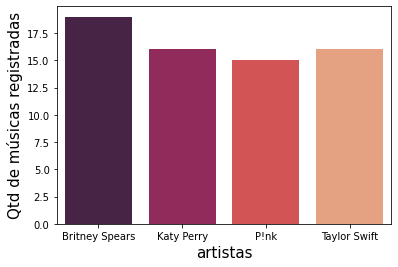

In [324]:
sns.barplot(x='artist', y='count', data=top_5, palette="rocket")
plt.xlabel('artistas', fontsize=15)
plt.ylabel('Qtd de músicas registradas', fontsize=15)